In [2]:
import numpy as np
import matplotlib.pyplot as plt


# clos

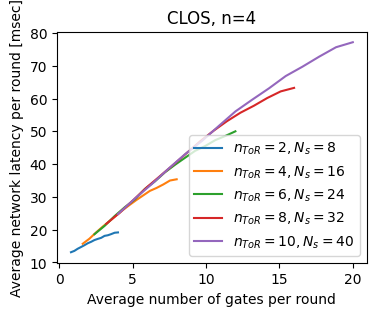

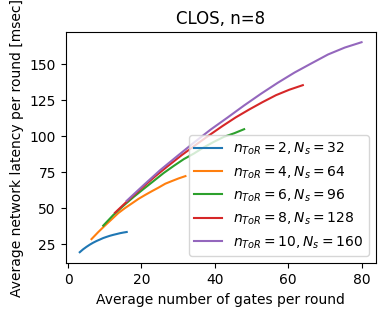

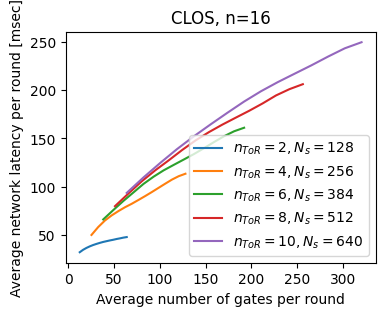

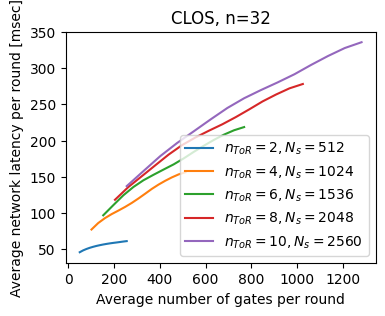

In [22]:
n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

for n in n_list:
    plt.figure(figsize=(4,3))
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        num_ToR_list = f1['arr_0'] 
        lam_gate_list = f1['arr_1'] 
        num_node_list = f1['arr_2'] 
        if i_rep ==0:
            Ntot = np.zeros((len(num_ToR_list),len(lam_gate_list)))
            Tavg = np.zeros((len(num_ToR_list),len(lam_gate_list)))
        Nq = f1['arr_3']
        Ntot += Nq
        Tavg += f1['arr_4'] * Nq

    Tavg = Tavg/Ntot
    for i_tor, num_ToR in enumerate(num_ToR_list):
        # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
        plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",label=r"$n_{ToR}=$"+f"{num_ToR}"+r"$,N_s=$"+f"{n**2/4*num_ToR:.0f}")

    plt.legend()
    # plt.xlim(0,200)
    # plt.ylim(1,250)
    plt.title(f"CLOS, n={n}")
    plt.xlabel("Average number of gates per round")
    plt.ylabel("Average network latency per round [msec]")
    plt.show()

superimposed

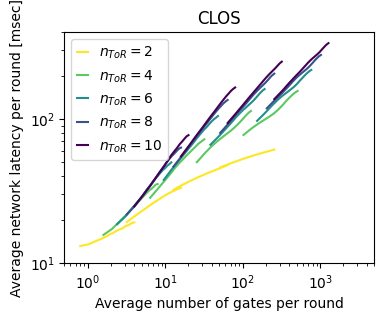

In [97]:
n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files
plt.figure(figsize=(4,3))

for n in n_list:
    # plt.figure(figsize=(4,3))
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        num_ToR_list = f1['arr_0'] 
        lam_gate_list = f1['arr_1'] 
        num_node_list = f1['arr_2'] 
        if i_rep ==0:
            Ntot = np.zeros((len(num_ToR_list),len(lam_gate_list)))
            Tavg = np.zeros((len(num_ToR_list),len(lam_gate_list)))
        Nq = f1['arr_3']
        Ntot += Nq
        Tavg += f1['arr_4'] * Nq

    Tavg = Tavg/Ntot

    y_color = np.linspace(0,1,len(num_ToR_list))
    colors_bar = plt.cm.viridis_r(y_color)
    color = np.zeros(4)
    
    custom_cmap = create_color_map(start_color, end_color, n)

    for i_tor, num_ToR in enumerate(num_ToR_list):
        y_val = num_ToR/10
    # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
        if n == 4:
            plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",color=colors_bar[i_tor,:],label=r"$n_{ToR}=$"+f"{num_ToR}")
        else:
            plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",color=colors_bar[i_tor,:])

plt.legend(handlelength=0.8)
# plt.xlim(0,200)
# plt.ylim(1,250)
plt.xlim(5e-1,5e3)
plt.ylim(1e1,4e2)
plt.xscale("log")
plt.yscale("log")
plt.title(f"CLOS")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show() 

    

8
96
896
7680


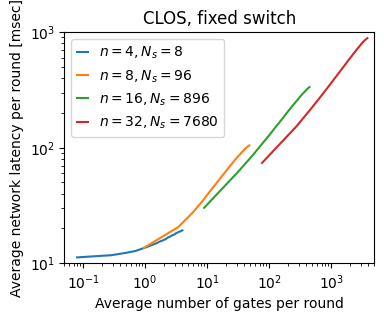

In [68]:
# no ToR

n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

plt.figure(figsize=(4,3))
for n in n_list:
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_noToR_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        lam_gate_list = f1['arr_0'] 
        num_node = f1['arr_1'] 
        if i_rep ==0:
            Ntot = np.zeros(len(lam_gate_list))
            Tavg = np.zeros(len(lam_gate_list))
        Nq = f1['arr_2']
        Ntot += Nq
        Tavg += f1['arr_3'] * Nq

    Tavg = Tavg/Ntot
    print(num_node)
    # print(lam_gate_list.shape)
    plt.plot(num_node*lam_gate_list,Tavg*1e3,"-",label=r"$n=$"+f"{n}"+r"$,N_s=$"+f"{n**2/4*(n-2):.0f}")

plt.legend(handlelength=0.8)
# plt.xlim(0,200)
# plt.ylim(1,250)
plt.xlim(5e-2,5e3)
plt.ylim(1e1,1e3)
plt.xscale("log")
plt.yscale("log")
plt.title(f"CLOS, fixed switch")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show()

# fat tree

16
128
1024
8192


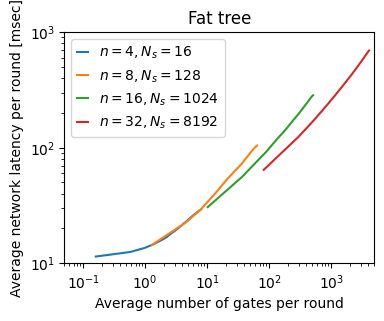

In [69]:
n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

plt.figure(figsize=(4,3))
for n in n_list:
    for i_rep in range(Nrep):
        fname = f"results/network_sim/fattree_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        lam_gate_list = f1['arr_0'] 
        num_node = f1['arr_1'] 
        if i_rep ==0:
            Ntot = np.zeros(len(lam_gate_list))
            Tavg = np.zeros(len(lam_gate_list))
        Nq = f1['arr_2']
        Ntot += Nq
        Tavg += f1['arr_3'] * Nq

    Tavg = Tavg/Ntot
    print(num_node)
    plt.plot(num_node*lam_gate_list,Tavg*1e3,"-",label=r"$n=$"+f"{n}"+r"$,N_s=$"+f"{n**3/4:.0f}")

plt.legend(handlelength=0.8)
plt.xlim(5e-2,5e3)
plt.ylim(1e1,1e3)
plt.xscale("log")
plt.yscale("log")
plt.title(f"Fat tree")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show()

# hyperX

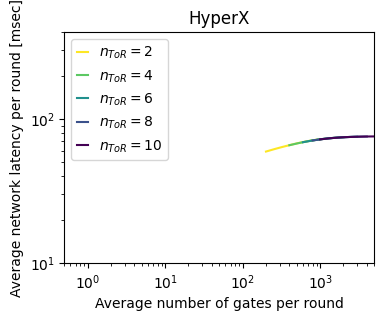

In [99]:
S_list = [4,10] # number of switches for each dim (assuming uniform/regular hyperX network)
L = 3 #len(S) # number of lattice dims
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files
plt.figure(figsize=(4,3))

for i_s, S in enumerate(S_list):
    for i_rep in range(Nrep):
        fname = f"results/network_sim/hyperx_{S}_{L}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        num_ToR_list = f1['arr_0'] 
        lam_gate_list = f1['arr_1'] 
        num_node_list = f1['arr_2'] 
        if i_rep ==0:
            Ntot = np.zeros((len(num_ToR_list),len(lam_gate_list)))
            Tavg = np.zeros((len(num_ToR_list),len(lam_gate_list)))
        Nq = f1['arr_3']
        Ntot += Nq
        Tavg += f1['arr_4'] * Nq

    Tavg = Tavg/Ntot

    y_color = np.linspace(0,1,len(num_ToR_list))
    colors_bar = plt.cm.viridis_r(y_color)

    for i_tor, num_ToR in enumerate(num_ToR_list):
        y_val = num_ToR/10
    # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
        if i_s ==0:
            plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",color=colors_bar[i_tor,:], label=r"$n_{ToR}=$"+f"{num_ToR}")
        else:
            plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",color=colors_bar[i_tor,:])

plt.legend(handlelength=0.8)
# plt.xlim(0,200)
# plt.ylim(1,250)
plt.xlim(5e-1,5e3)
plt.ylim(1e1,4e2)
plt.xscale("log")
plt.yscale("log")
plt.title(f"HyperX")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show() 

